# Titanic: Machine Learning from Disaster

### The Problem is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [187]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [188]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
print("train shape  :",train.shape)
print("test  shape  :",test.shape)
train.Survived = train.Survived.astype(int) 

train shape  : (891, 12)
test  shape  : (418, 11)


In [189]:
df = pd.concat([train,test],sort = False)
df.columns = [i.lower() for i in df.columns]
print("Dataframe shape :",df.shape)

Dataframe shape : (1309, 12)


In [190]:
# Numeric columns of dataframe
num_col = df.select_dtypes("number").columns
num_col

Index(['passengerid', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [191]:
# Categorical columns of dataFrame

cat_col = df.select_dtypes("object").columns
cat_col

Index(['name', 'sex', 'ticket', 'cabin', 'embarked'], dtype='object')

In [192]:
# let's understand data in terms stats 
# for numeric columns
df[num_col].describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [193]:
# let's understand data of categorical columns
df[cat_col].describe()

,name,sex,ticket,cabin,embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [194]:
mis_col = pd.Series([i for i in df.columns if(df[i].isnull().sum()>0)])
total   = pd.Series([df[i].isnull().sum() for i in df.columns if(df[i].isnull().sum()>0)])
percent = pd.Series([i/df.shape[0]*100  for i in total] )
missing = pd.concat([mis_col,total,percent],axis = 1,keys = ["Missing Columns","Total","percent"]).sort_values(by ="Total",ascending = False)
missing.reset_index(drop = True,inplace = True)
print("Table showing columns with  total missing values and it's percentage :")
print("="*50)
missing

Table showing columns with  total missing values and it's percentage :


,Missing Columns,Total,percent
0,cabin,1014,77.463713
1,survived,418,31.932773
2,age,263,20.091673
3,embarked,2,0.152788
4,fare,1,0.076394


In [195]:
# let's try to fill missing value of fare column
fare_missing_record = df[df.fare.isnull()].iloc[:,:]
fare_missing_record

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


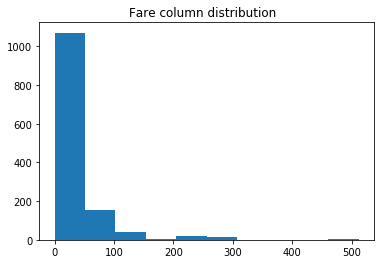

In [196]:
# before handling missing value of fare columns
# let's visulize it first
plt.hist(df.fare)
plt.title("Fare column distribution  ")
plt.show()

###### as you can see fare column is not in the form of normal distribution (gaussian distribution ) ,hence imputing with mean value  won't work here ,  therefore impute missing value with median

In [197]:
# let's impute missing value of fare column with it's median value,
df.fare.fillna(df.fare.median(),inplace = True)
df.fare.isnull().sum()

0

In [198]:
# let's try handle missing values of embarked column

embarked_miss_index = np.where(df.embarked.isnull()==True)
print(" records cantainig missing values in embarked column : ")
df.iloc[[61,829],:]

 records cantainig missing values in embarked column : 


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [199]:
#let's impute embark column missing value with most frequent embarked value provided only sex is equal to female
v = df[df.sex == "female"]["embarked"]
df.embarked.fillna(v.mode()[0],inplace = True,axis = 0)
print("Number of missing values in embarked column :",df.embarked.isnull().sum())

Number of missing values in embarked column : 0


Mean age   : 29.88
Median age : 28.0


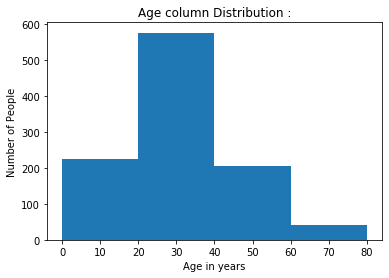

In [200]:
# let's try to handle missing values in age column 
print("Mean age   :",round(df.age.mean(),2))
print("Median age :",df.age.median())
plt.hist(df["age"],bins = [0,20,40,60,80])
plt.title("Age column Distribution :")
plt.ylabel("Number of People")
plt.xlabel("Age in years")
plt.show()

In [201]:
age_misn_index  = df[df.age.isnull()].index
age_mdf  = df.iloc[age_misn_index,:]
age_mdf

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
408,409,0.0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
410,411,0.0,3,"Sdycoff, Mr. Todor",male,NaN,0,0,349222,7.8958,NaN,S
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
416,417,1.0,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S


# let's impute age column missing values with random sample imputation

In [202]:
random_sample = df.age.dropna().sample(df.age.isnull().sum(),random_state = 0)
random_sample.index = df[df.age.isnull()].index
df.loc[df.age.isnull(),"age"] = random_sample
print("Number of missing values in age column: ",df.age.isnull().sum())

Number of missing values in age column:  0


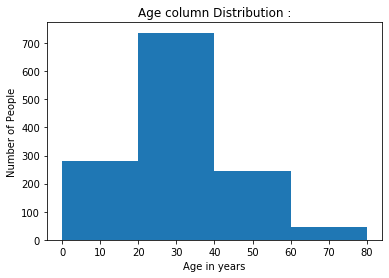

In [203]:
# let's try to handle missing values in age column
plt.hist(df["age"],[0,20,40,60,80])
plt.title("Age column Distribution :")
plt.ylabel("Number of People")
plt.xlabel("Age in years")
plt.show()

In [204]:
#let's try to handle missing value in cabin column 
df.iloc[df[df.cabin.isnull()].index ,:]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,23.0,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,413,1.0,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,17.0,0,0,239853,0.0000,NaN,S
415,416,0.0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,27.0,0,0,343095,8.0500,NaN,S
416,417,1.0,2,"Drew, Mrs. James Vivian (Lulu Thorne Christian)",female,34.0,1,1,28220,32.5000,NaN,S


In [205]:
# we'll drop cabin column ,because it has more than 70% of missing values in it
print("Percentage of missing values in Cabin column is : ",df.cabin.isnull().sum()/len(df)*100)
df.drop(["cabin"],axis = 1,inplace = True)

Percentage of missing values in Cabin column is :  77.46371275783041


In [206]:
df.drop(["name"],axis = 1,inplace = True)
df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S


# outlier analysis

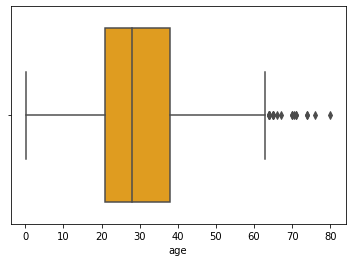

In [207]:
# for age column
sns.boxplot(df["age"],color = "orange")

In [208]:
q1,q3 = df.age.quantile(0.25),df.age.quantile(0.75)
iqr   = q3 - q1
print("q1 value is : {} and q3 value is : {} and iqr value is {}".format(q1,q3,iqr),end = "\n")

lb = q1 - iqr * 1.5
ub = q3 + iqr * 1.5
print("Lower bound of age is :",lb) # note : here age is negative ,and it makes no sense at all
print("Upper bound of age is :",ub)

q1 value is : 21.0 and q3 value is : 38.0 and iqr value is 17.0
Lower bound of age is : -4.5
Upper bound of age is : 63.5


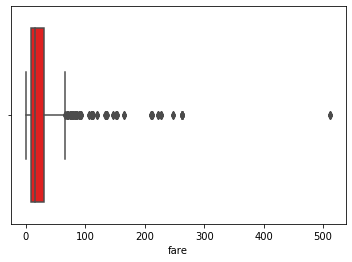

In [209]:
# for fare column
sns.boxplot(df["fare"],color = "red")

In [210]:
q1,q3 = df.fare.quantile(0.25),df.fare.quantile(0.75)
iqr   = q3 - q1
print("q1 value is : {} and q3 value is : {} and iqr value is {}".format(q1,q3,iqr),end = "\n")

lb = q1 - iqr * 1.5
ub = q3 + iqr * 1.5
print("Lower bound of fare is :",lb) # note : here fare is negative ,and it makes no sense at all (fare can't be negative)
print("Upper bound of fare is :",ub)

q1 value is : 7.8958 and q3 value is : 31.275 and iqr value is 23.379199999999997
Lower bound of fare is : -27.172999999999995
Upper bound of fare is : 66.34379999999999


In [211]:
df["family"] = df["parch"] + df["sibsp"]
df.drop(["parch","sibsp","ticket"],axis = 1,inplace = True)

# let's convert all catergorical values into  numeric values using dummies encoding technique

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
passengerid    1309 non-null int64
survived       891 non-null float64
pclass         1309 non-null int64
sex            1309 non-null object
age            1309 non-null float64
fare           1309 non-null float64
embarked       1309 non-null object
family         1309 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


In [213]:
df = pd.get_dummies(df,columns = ["sex","embarked"],drop_first  = True,prefix = ["S","E"])

In [214]:
df.head()

,passengerid,survived,pclass,age,fare,family,S_male,E_Q,E_S
0,1,0.0,3,22.0,7.2500,1,1,0,1
1,2,1.0,1,38.0,71.2833,1,0,0,0
2,3,1.0,3,26.0,7.9250,0,0,0,1
3,4,1.0,1,35.0,53.1000,1,0,0,1
4,5,0.0,3,35.0,8.0500,0,1,0,1


In [215]:
train = df.iloc[0:891,:]
test  = df.iloc[891:,:]
train.drop(["passengerid"],axis = 1,inplace = True)
test.drop(["passengerid"],axis = 1,inplace = True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [216]:
xtrain = train.drop("survived",axis = 1)
ytrain = train["survived"]

In [217]:
test.drop(["survived"],inplace = True,axis =1)

In [218]:
test.head()

,pclass,age,fare,family,S_male,E_Q,E_S
0,3,34.5,7.8292,0,1,1,0
1,3,47.0,7.0000,1,0,0,1
2,2,62.0,9.6875,0,1,1,0
3,3,27.0,8.6625,0,1,0,1
4,3,22.0,12.2875,2,0,0,1


##  Let''s build model using logistic regression 

In [219]:
from sklearn.linear_model    import LogisticRegression

In [220]:
clf = LogisticRegression()
clf.fit(xtrain,ytrain)
output = clf.predict(test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [221]:
output = np.array(output,int)

In [222]:
PassengerId = np.arange(892,1310,1)
Survived    = output
PassengerId = pd.Series(PassengerId)
Survived    = pd.Series(output)

In [223]:
a = pd.concat([PassengerId,Survived ],axis = 1,keys = ["PassengerId","Survived"])

In [224]:
a.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


0    269
1    149
Name: Survived, dtype: int64


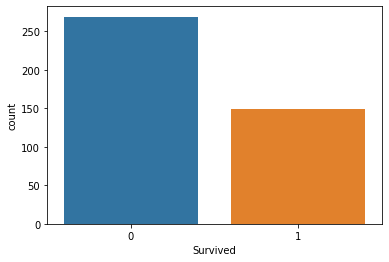

In [225]:
print(a.Survived.value_counts()) 
sns.countplot(a["Survived"])
# blue indicates number of people died , count = 269
# orange indicates number of people alive, count = 149


# Decision Tree

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [227]:
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
output = clf.predict(test)

In [228]:
output = np.array(output,int)
PassengerId = np.arange(892,1310,1)
Survived    = output
PassengerId = pd.Series(PassengerId)
Survived    = pd.Series(output)
a = pd.concat([PassengerId,Survived ],axis = 1,keys = ["PassengerId","Survived"])


In [229]:
a.to_csv("New.csv",index = False)

In [230]:
a.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


0    255
1    163
Name: Survived, dtype: int64


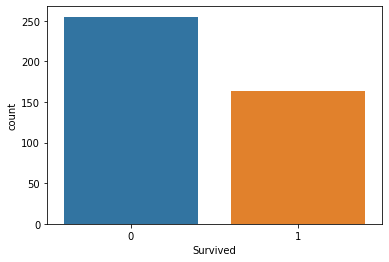

In [231]:
print(a.Survived.value_counts()) 
sns.countplot(a["Survived"])
# blue indicates number of people died , count = 252
# orange indicates number of people alive, count = 166